In [22]:
! pip install scikit-learn
! pip install pandas
! pip install numpy
! pip install seaborn
! pip install session-info

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report
import pickle
import session_info

session_info.show()

In [24]:
dict_iris = load_iris(as_frame=True) # ["data"][:10]
model = SVC()
model.fit(X=dict_iris["data"][:130], y=dict_iris["target"][:130])
y_pred = model.predict(dict_iris["data"][130:])

In [25]:
y_test = dict_iris["target"][130:]
print(f"Estimacion: ", y_pred[:5])
print(f"Real: ", y_test[:5])
print(f"La precision es de:", accuracy_score(y_test,y_pred))

Estimacion:  [2 2 2 1 2]
Real:  130    2
131    2
132    2
133    2
134    2
Name: target, dtype: int64
La precision es de: 0.9


In [26]:
y_pred

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Recolectar información

In [27]:
# Cargar datos
iris_dict = load_iris(as_frame=True)
iris_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
#Leer DataFrame
df = iris_dict["frame"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.shape

(150, 5)

In [30]:
#Leer etiquetas de salida
iris_dict["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
# Revisar balance de datos
df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [32]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [33]:
# valores duplicados
df.duplicated().sum()

1

In [34]:
df[df.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [44]:
# Leer matriz de características
X = df.drop(columns=["target"]).values

# Leer vector obejtivo "y"
y = df["target"].values

# Separar dataset en "entranamiento_validacion" y "prueba" (80/20)
X_train_val, X_test, y_train_val,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Separar entrenamoento_ validacion en entrenamiento y validacion (80/20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.2, random_state=0)

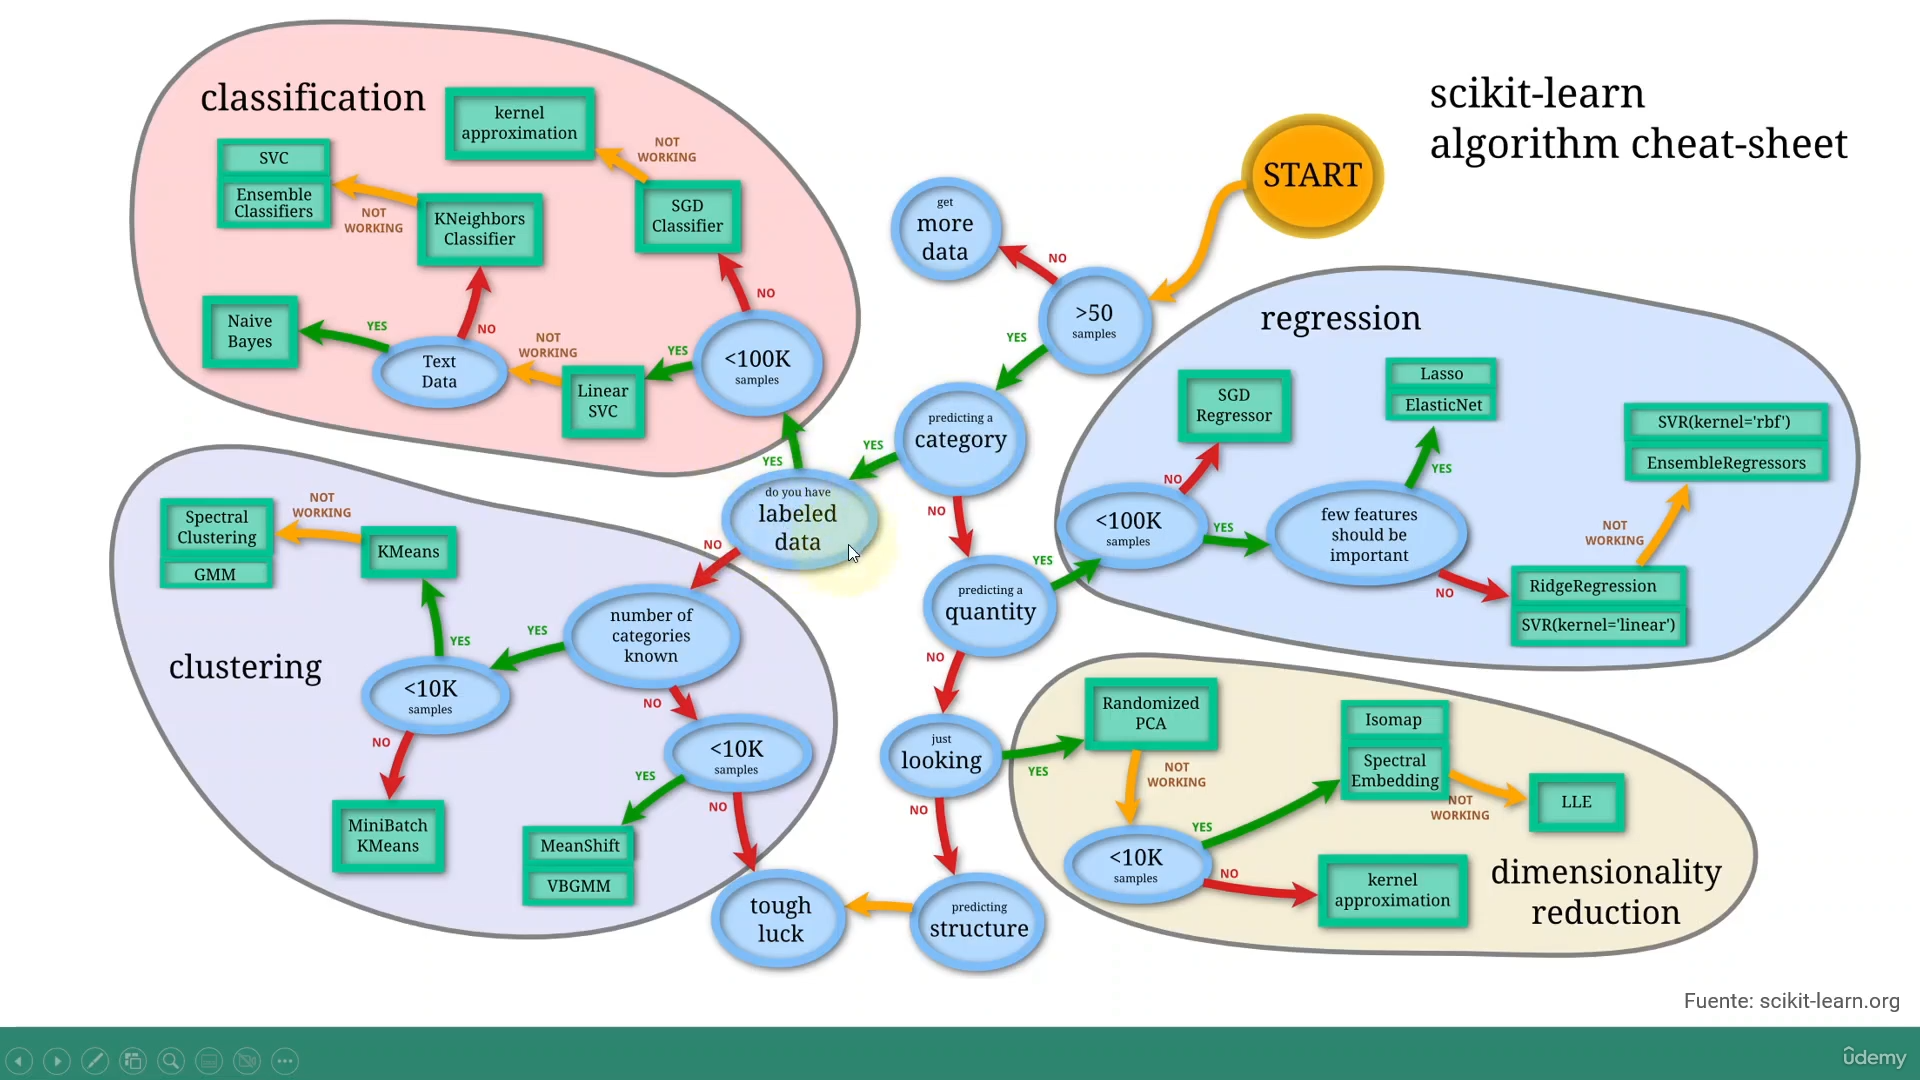

In [45]:
#Seleccionar modelo

model = SVC(kernel="linear")

In [46]:
#entrenar modelo
model.fit(X_train,y_train)

SVC(kernel='linear')

# Evaluar modelo

In [48]:
# Evaluar el modelo de datos
score_train = model.score(X_train,y_train)
print("score_train: ",score_train)

# Otra manera de evaluar los datos
y_train_pred = model.predict(X_train)
score_train = accuracy_score(y_train, y_train_pred)
print("score_train: ", score_train)


# Evaluar los datos de validación
y_val_pred = model.predict(X_val)
score_val = accuracy_score(y_val,y_val_pred)
print("score_val: ", score_val)

score_train:  1.0
score_train:  1.0
score_val:  0.9166666666666666


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.71      0.83         7
           2       0.82      1.00      0.90         9

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.93      0.92      0.91        24

[[8 0 0]
 [0 5 2]
 [0 0 9]]


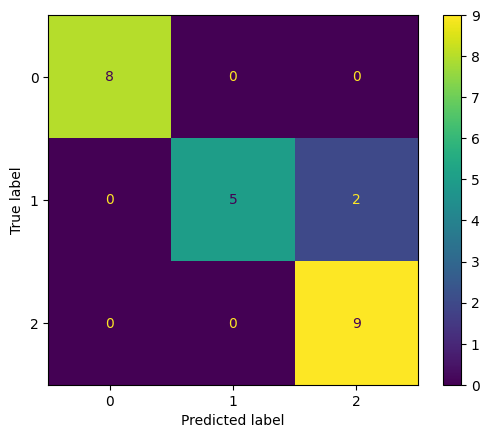

In [55]:
# Crear reporte de clasificación

print(classification_report(y_val,y_val_pred))

# Crear matriz de confusion
cm = confusion_matrix(y_val,y_val_pred,labels=model.classes_)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot();

# Ajustar HiperParámetros

In [56]:
model = SVC()
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [58]:
# Seleccionar modelo
model = SVC()

# Definir hiperparámetros a ajustar
parameters_grid = {
    'kernel':['rbf','linear','sigmoid','poly'],
    'C':[1,3,7,10],
    'gamma': ['scale','auto']
}

# Utilizar método grid search con "croos_validation"
model_adj = GridSearchCV(model,parameters_grid, cv=5, scoring="accuracy")
model_adj.fit(X_train_val, y_train_val)

#Evaluar el modelo
score = model_adj.score(X_train_val,y_train_val)
print("Score: ", score)

Score:  0.9666666666666667


/home/juanandresyounghoyos/.pyenv/versions/3.12.7/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [60]:
# Leer resultados de Grid search CV

model_adj.cv_results_
pd.DataFrame(model_adj.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,0.003020,0.000518,0.002409,0.000434,7,scale,rbf,"{'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}",0.958333,1.000000,1.0,1.0,0.875,0.966667,0.048591,1
0,0.003234,0.000198,0.002735,0.000231,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.958333,0.958333,1.0,1.0,0.875,0.958333,0.045644,2
29,0.002399,0.000195,0.002308,0.000451,10,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.958333,0.958333,1.0,1.0,0.875,0.958333,0.045644,2
28,0.002775,0.000440,0.002162,0.000118,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.958333,0.958333,1.0,1.0,0.875,0.958333,0.045644,2
25,0.002801,0.000276,0.002172,0.000198,10,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.958333,0.958333,1.0,1.0,0.875,0.958333,0.045644,2


In [61]:
model_adj.best_score_

0.9666666666666668

In [62]:
model_adj.best_params_

{'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}

# Evaluación final

In [63]:
# Estimar y evaluar los datos
y_test_pred = model_adj.predict(X_test)
score_test = accuracy_score(y_test, y_test_pred)
print("score_test: ", score_test)


score_test:  1.0


In [68]:
# Guardar modelo

model = model_adj
model_type = "classification"
library_name = "svc_sklearn"+ "_" + sklearn.__version__.replace(".","_")
model_name = model_type + "_" + library_name + ".pickle"

pickle.dump(model, open(model_name,"wb"))

print(type(model))
print("Modelo: ",model_name)

<class 'sklearn.model_selection._search.GridSearchCV'>
Modelo:  classification_svc_sklearn_1_5_2.pickle


# Estimar

In [69]:
model_name

'classification_svc_sklearn_1_5_2.pickle'

In [70]:
clf_model = pickle.load(open(model_name,"rb"))

In [77]:
X_new = np.array([[3.0,2.0,1.0,0.2],
                  [4.0,2.2,3.8,1.1],
                  [5.3,2.5,4.6,1.9]])

In [78]:
y_new = clf_model.predict(X_new)
print(y_new)

[0 1 2]


In [80]:
dictionary = {0:'setosa', 1:'versicolor', 2:'virginia'}
y_new_label = [dictionary[i]for i in y_new]
print(y_new_label)

['setosa', 'versicolor', 'virginia']
